# 绘制 Mandelbrot 集

我们考虑 `x-y` 平面上位于点 (-2.5, -1.0) 和 (1.0, 1.0) 之间的区域，并把每个轴划分为 400 个等间距点，这些点的笛卡尔积将给出该区域内的 1600 个等距点，我们把这些点记为：(x<sub>1</sub>, y<sub>1</sub>)，(x<sub>2</sub>, y<sub>2</sub>) ... (x<sub>400</sub>, y<sub>400</sub>)。  
通过调用“08-马赛克”中的 `initialize_image()` 函数创建一个列表 `image`，并将函数中的 x_p，y_p都设置为 400。然后，为每个生成的点 (x<sub>i</sub>， y<sub>k</sub>) 执行下述步骤：  
1. 首先，创建两个复数，z<sub>1</sub> = 0 + 0j 和 z<sub>2</sub> = x<sub>i</sub> + y<sub>k</sub>j。（我们用 j 表示 -1<sup>1/2</sup>）
2. 创建一个迭代标签，并将其设置为 0，即 iteration = 0
3. 创建一个复数 z<sub>1</sub> = z<sub>1</sub><sup>2</sup> + c
4. 以 1 为单位增加 iteration 的值，即 iteration = iteration + 1
5. 若 abs(z<sub>1</sub>) < 2 且 iteration < max_iteration，则返回到第 3 步；否则进入第 6 步。
    - max_iteration 的值越大，绘制的图像越详细，当然花费的时间也越长。这里设置 iteration = 1000
6. 将点 (x<sub>i</sub>, y<sub>k</sub>) 的颜色设置为 iteration 的值，即 image[i][k] = iteration

一旦有了完整的 `image` 列表，调用 `imshow()` 函数，并将 `extent` 关键字参数设置为 (-2.5, -1.0) 和 (1.0, 1.0) 之间的区域。  
这个算法通常称为时间逃逸算法。当一个点达到最大迭代次数时仍在区域内（即复数 z<sub>1</sub> 的模小于 2），则该点属于 `Mandelbrot` 集，将其涂成白色。那些未达到最大迭代次数就超出区域的点称为“逃逸”，他们不属于 `Mandelbrot` 集，将其涂成黑色。  
你可以通过减少和增加每一个轴上点的个数来进行实验，减少点的个数会导致颗粒图像，而增加点的个数则会产生更加细致的图像。

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Subset of the complex plane we are considering
x0, x1 = -2.5, 1
y0, y1 = -1, 1

def initialize_image(x_p, y_p):
    image = []
    for i in range(y_p):
        x_colors = []
        for j in range(x_p):
            x_colors.append(0)
        image.append(x_colors)
    return image

def mandelbrot_set():
    # Number of divisions along each axis
    n = 400
    # Maximum iterations
    max_iteration=1000
    
    image = initialize_image(n, n)
    
    # Generate a set of equally spaced points in the region
    # above
    dx = (x1-x0)/(n-1)
    dy = (y1-y0)/(n-1)
    x_coords = [x0 + i*dx for i in range(n)]
    y_coords = [y0 + i*dy for i in range(n)]

    for i, x in enumerate(x_coords):
        for k, y in enumerate(y_coords):
            z1 = complex(0, 0)
            iteration = 0
            c = complex(x, y)
            while (abs(z1) < 2  and iteration < max_iteration):
                z1 = z1**2 + c
                iteration += 1
            image[k][i] = iteration
    return image

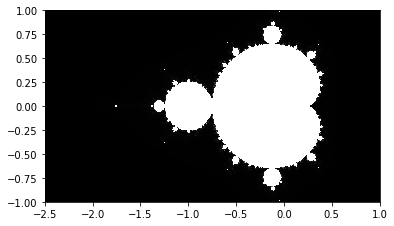

In [3]:
if __name__ == '__main__':
    image = mandelbrot_set()
    plt.imshow(image, origin='lower', extent=(x0, x1, y0,y1), cmap=cm.Greys_r, interpolation='nearest')
    plt.show()